# Pandas Tutorial

## Pandas and Numpy


NumPy is mostly written in C language, and it is an extension module of Python. The calculations using Numpy arrays are faster than the normal Python array.

Pandas are built over numpy array; therefore, numpy helps us to use pandas more effectively.

  Comparison       | Pandas  | NumPy
-------------------|--------------------|-------------------|
Works with      | Pandas module works with the **tabular** data    | NumPy module works with **numerical** data  |
Powerful Tools     | Pandas has powerful tools like **Series, DataFrame** etc       | NumPy has a powerful tool like **Arrays**  |
Performance    | Pandas has a better performance for **500K rows** or more      | NumPy has a better performance for **50K rows or less**  |
Memory Utilization     | Pandas consume **large memory** as compared to NumPy      | NumPy consumes **less memory** as compared to Pandas  |
Objects     | Pandas provides 2d table object called **DataFrame**       | NumPy provides a **multi-dimensional array** |


In [45]:
# Create a Series using a NumPy array of ages but customize the indices to be the names that correspond to each age
ages = np.array([13,25,19])
series1 = pd.Series(ages,index=['Emma', 'Swetha', 'Serajh'])
print(series1)

Emma      13
Swetha    25
Serajh    19
dtype: int64


In [47]:
type(series1)

pandas.core.series.Series

In [48]:
#create pandas DataFrame
df = pd.DataFrame({'points': [25, 12, 15, 14, 19, 23, 25, 29],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12]})

#create NumPy array for 'blocks'
blocks = np.array([2, 3, 1, 0, 2, 7, 8, 2])
#add 'blocks' array as new column in DataFrame
df['blocks'] = blocks.tolist()

print(df)

   points  assists  rebounds  blocks
0      25        5        11       2
1      12        7         8       3
2      15        7        10       1
3      14        9         6       0
4      19       12         6       2
5      23        9         5       7
6      25        9         9       8
7      29        4        12       2


## Pandas and matplotlib

matplotlib is a Python package used for data plotting and visualisation. It is a useful complement to Pandas, and like Pandas, is a very feature-rich library which can produce a large variety of plots, charts, maps, and other visualisations. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.close("all") # The plt.close method is used to close a figure window

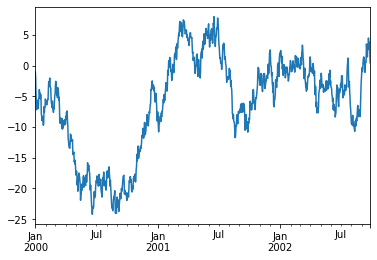

In [6]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

On a DataFrame, the **plot()** method is a convenience to plot all of the columns with labels:

In [10]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
    )
df = df.cumsum()
df.head()

,A,B,C,D
2000-01-01,-0.441713,1.476727,-0.208422,0.320046
2000-01-02,0.353115,2.422205,1.924214,0.266394
2000-01-03,0.047349,2.323432,2.389242,0.259996
2000-01-04,0.478681,2.914298,1.244912,-0.172872
2000-01-05,2.285770,3.088527,0.550060,-0.818078


<Figure size 432x288 with 0 Axes>

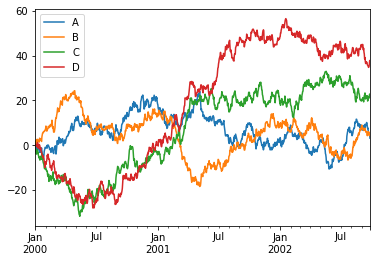

In [9]:
plt.figure();
df.plot();
plt.legend(loc='best');

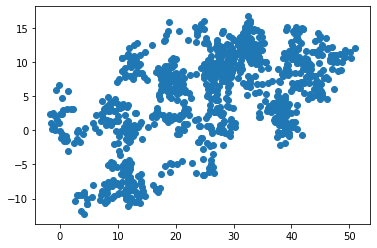

In [12]:
A = df.A
B = df.B
plt.scatter(A, B)

## Pandas and Scikit-Learn

[Kaggle](https://www.kaggle.com) is a popular platform for doing competitive machine learning. Let's use Kaggle data to perform machine learning tasks.

In [37]:
import pandas as pd

url = 'http://bit.ly/kaggletrain'
train = pd.read_csv(url)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
train = pd.get_dummies(train.drop(['Name','Ticket'], axis=1), drop_first = True)  # Convert categorical variable into dummy/indicator variables.
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A14,Cabin_A16,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
train = train.dropna()

Prepare Test dataset

In [33]:
url_test = 'http://bit.ly/kaggletest'
test = pd.read_csv(url_test)

# missing Survived column because we are predicting
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
test = pd.get_dummies(test.drop(['Name','Ticket'], axis=1), drop_first=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A18,Cabin_A21,Cabin_A29,...,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
test = test.dropna()

Build scikit-learn model

In [30]:
from sklearn.model_selection import train_test_split # For spliting the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, f1_score # For model evaluation

Split the data

Split the train data into into two parts (so as fit the model on one part & evaluate it on the second part of the data)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], 
                                                    test_size=0.3, 
                                                    random_state=101)

Logistic Regression

A famous and very common algorithm used for binary classification.

In [42]:
LR = LogisticRegression()

LR.fit(X_train, y_train)
predictions1 = LR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model Evaluation

In [43]:
print(confusion_matrix(y_test, predictions1))
print("\n")
print(classification_report(y_test, predictions1))
print("\n")
print("F1 Score :",f1_score(y_test, predictions1))

[[110  13]
 [ 35  57]]


              precision    recall  f1-score   support

           0       0.76      0.89      0.82       123
           1       0.81      0.62      0.70        92

    accuracy                           0.78       215
   macro avg       0.79      0.76      0.76       215
weighted avg       0.78      0.78      0.77       215



F1 Score : 0.7037037037037036


## Pandas and Scipy

SciPy contains more fully-featured versions of the linear algebra modules, as well as many other numerical algorithms. If you are doing scientific computing with python, you should probably install both NumPy and SciPy. Most new features belong in SciPy rather than NumPy.

In [49]:
from scipy.linalg import inv

In [51]:
df = pd.DataFrame(np.random.rand(5,5), columns=list('abcde'))
df

,a,b,c,d,e
0,0.636167,0.698504,0.494018,0.401487,0.162070
1,0.159573,0.231764,0.602217,0.947520,0.403327
2,0.868101,0.385094,0.193196,0.270375,0.795973
3,0.990186,0.771096,0.103047,0.453532,0.914572
4,0.258966,0.663538,0.325280,0.124167,0.457038


Compute the inverse of a matrix.

In [52]:
pd.DataFrame(inv(df), columns=df.columns, index=df.index)

,a,b,c,d,e
0,1.145354,-0.500356,1.091777,-0.240116,-1.385533
1,0.288221,-0.324225,-1.939861,1.334495,0.891921
2,0.679061,0.244078,2.313107,-2.791629,1.101603
3,-0.039457,0.923524,-1.599188,1.593659,-1.204914
4,-1.540000,0.329614,0.985905,-0.247515,1.221477


In [54]:
from scipy.linalg import solve

In [60]:
Y = pd.DataFrame(np.random.rand(5,1))
Y

,0
0,0.612464
1,0.928337
2,0.149842
3,0.205490
4,0.081794


SciPy provides scipy.linalg.solve() to solve linear systems quickly and in a reliable way. To see how it works, consider the following system:

df * X = Y

In [61]:
X = solve(df, Y)
X

array([[ 0.23791227],
       [-0.06795849],
       [ 0.50554117],
       [ 0.82247575],
       [-0.44042272]])

## Pandas and Tensorflow

You will use a small [heart disease dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease/) provided by the UCI Machine Learning Repository. There are several hundred rows in the CSV. Each row describes a patient, and each column describes an attribute. You will use this information to predict whether a patient has heart disease, which is a binary classification task.

In [62]:
import pandas as pd
import tensorflow as tf

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

In [63]:
#Download the CSV file containing the heart disease dataset:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

13273/13273 [==============================] - 0s 0us/step


In [64]:
df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [65]:
#predict the label contained in the target column.
target = df.pop('target')

In [66]:
#Take the numeric features from the dataset (skip the categorical features for now)
numeric_feature_names = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']
numeric_features = df[numeric_feature_names]
numeric_features.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


In [67]:
#To convert it to a tensor, use tf.convert_to_tensor
tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6],
       ...,
       [ 65. , 127. , 135. , 254. ,   2.8],
       [ 48. , 150. , 130. , 256. ,   0. ],
       [ 63. , 154. , 150. , 407. ,   4. ]])>

A DataFrame, interpreted as a single tensor, can be used directly as an argument to the **Model.fit** method.

Below is an example of training a model on the numeric features of the dataset.

The first step is to normalize the input ranges. Use a tf.keras.layers.Normalization layer for that.

To set the layer's mean and standard-deviation before running it be sure to call the Normalization.adapt method:

In [68]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)

In [69]:
#Use the normalization layer as the first layer of a simple model
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

When you pass the DataFrame as the x argument to Model.fit, Keras treats the DataFrame as it would a NumPy array:

In [72]:
model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
152/152 [==============================] - 1s 3ms/step - loss: 0.5916 - accuracy: 0.7228
Epoch 2/15
152/152 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.7195
Epoch 3/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4924 - accuracy: 0.7327
Epoch 4/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.7525
Epoch 5/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.7822
Epoch 6/15
152/152 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.7888
Epoch 7/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7888
Epoch 8/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8086
Epoch 9/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8053
Epoch 10/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.7987

## Pandas and Pytorch

In [74]:
import pandas as pd
import torch
import random

In [82]:
# creating dummy train data (float values)
train_df = pd.DataFrame(np.random.rand(10,5), columns=list('abcde'))
train_sensor = torch.tensor(train_df.values.astype(np.float32)) 

In [83]:
# creating dummy targets (float values)
targets_data = [random.random() for i in range(10)]

# creating DataFrame from targets_data
targets_df = pd.DataFrame(data=targets_data)
targets_df.columns = ['targets']

target_sensor = torch.tensor(targets_df.values.astype(np.float32)) 

To train a deep learning model, we need to create a DataLoader from the dataset. DataLoaders offer multi-worker, multi-processing capabilities without requiring us to right codes for that. So let’s first create a DataLoader from the Dataset.

In [84]:
import torch.utils.data as data_utils

#We will set batch_size to 8 
batch_size = 8

train = data_utils.TensorDataset(train_sensor, target_sensor) 
train_loader = data_utils.DataLoader(dataset = train, batch_size = batch_size, shuffle = True)

In [88]:
#Now we will check whether the dataset works as intended or not
for i, (data, labels) in enumerate(train_loader):
  print(data.shape, labels.shape)
  print(data,labels)
  break;

torch.Size([8, 5]) torch.Size([8, 1])
tensor([[0.2552, 0.2898, 0.0229, 0.0532, 0.1723],
        [0.6147, 0.2284, 0.3071, 0.8321, 0.2207],
        [0.0049, 0.9777, 0.9205, 0.5816, 0.7432],
        [0.6349, 0.8185, 0.2792, 0.1105, 0.6864],
        [0.8733, 0.4916, 0.7006, 0.3285, 0.1086],
        [0.9583, 0.4381, 0.4212, 0.9696, 0.7109],
        [0.3010, 0.2637, 0.6933, 0.8125, 0.3378],
        [0.1022, 0.2353, 0.6840, 0.1296, 0.5295]]) tensor([[0.1866],
        [0.7044],
        [0.5584],
        [0.9672],
        [0.1756],
        [0.4828],
        [0.2700],
        [0.1101]])
